In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [5]:
# Target: Use class as the classifier
wine = pd.read_csv("Wine dataset.csv")


In [6]:
print('Wine Stats')
print(wine.info())

Wine Stats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64

In [10]:
wine.head().style.background_gradient(cmap='Greys')

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.230000,1.710000,2.430000,15.600000,127,2.800000,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,1065
1,1,13.200000,1.780000,2.140000,11.200000,100,2.650000,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,1050
2,1,13.160000,2.360000,2.670000,18.600000,101,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,1185
3,1,14.370000,1.950000,2.500000,16.800000,113,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,1480
4,1,13.240000,2.590000,2.870000,21.000000,118,2.800000,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735


In [11]:
wine.describe(include='all').style.background_gradient(cmap='Greys')

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
# Explore the null values and data types
print(wine.dtypes)
print(wine.isnull().sum())

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object
class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of dil

# Exploratory Data Analysis

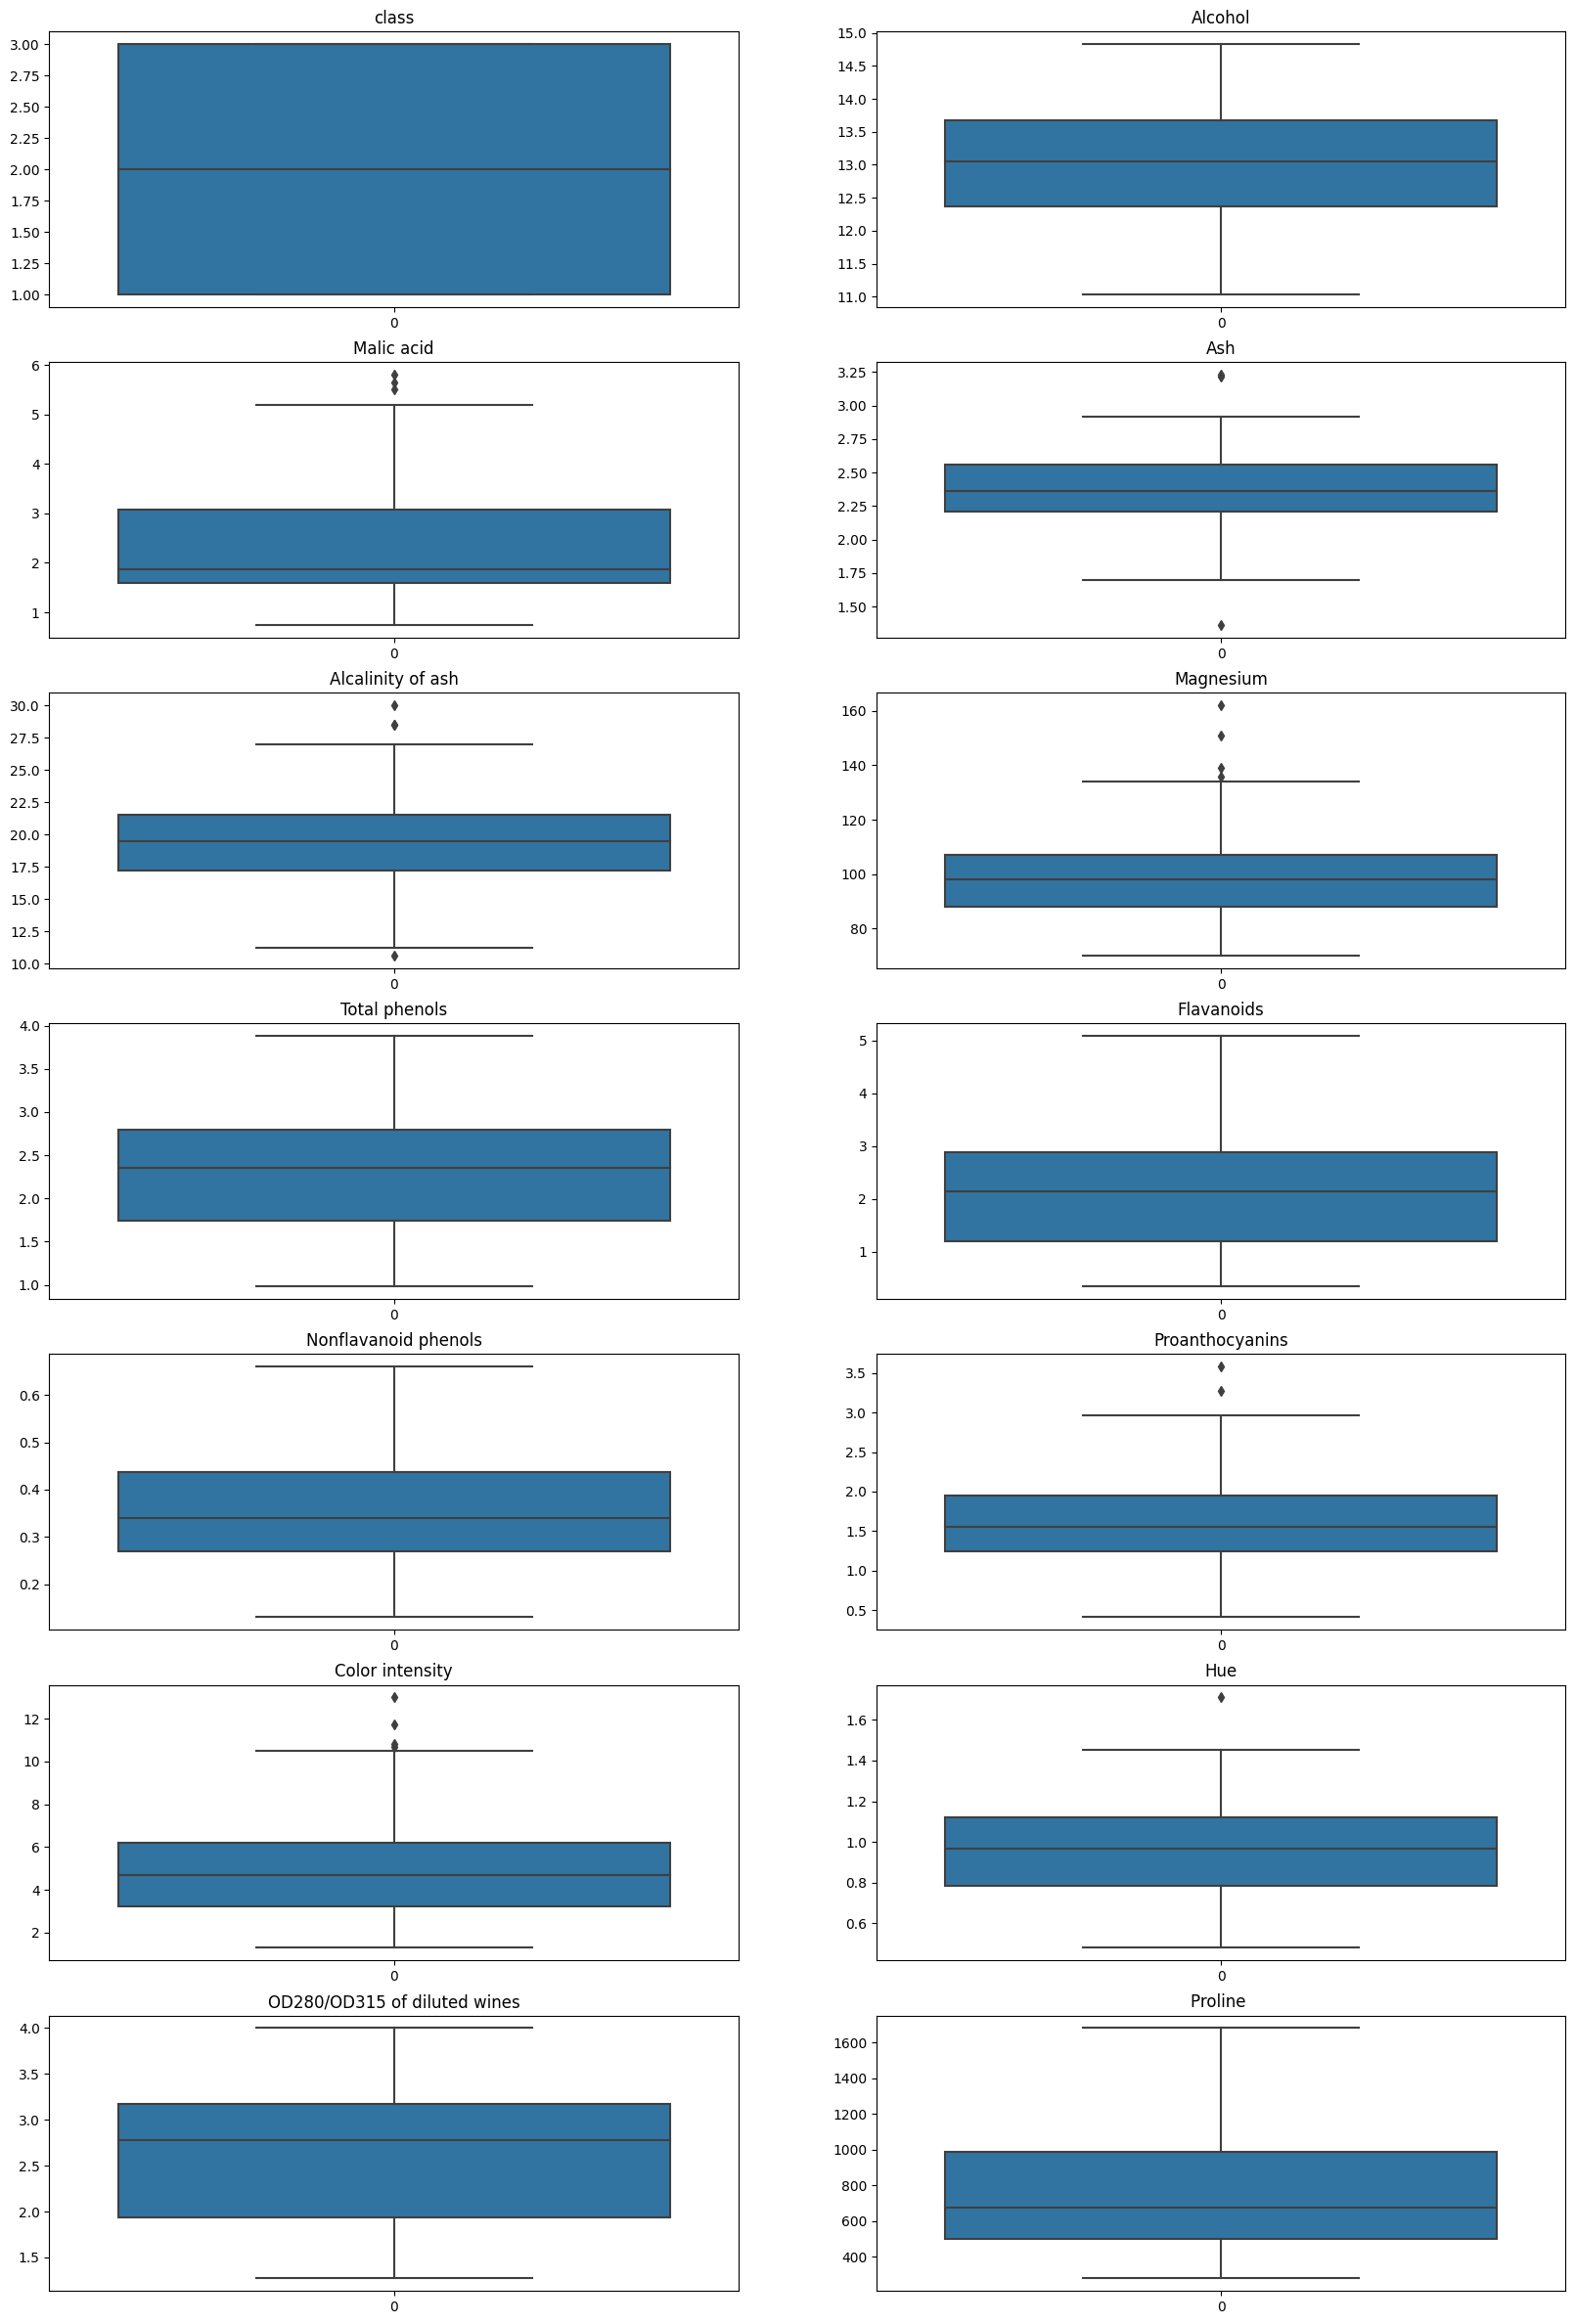

In [54]:
fig, axes = plt.subplots(nrows = 7, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(20,30)
for ax, col in zip(axes, wine.columns):
    sns.boxplot(wine[col], ax=ax)
    ax.set_title(col)

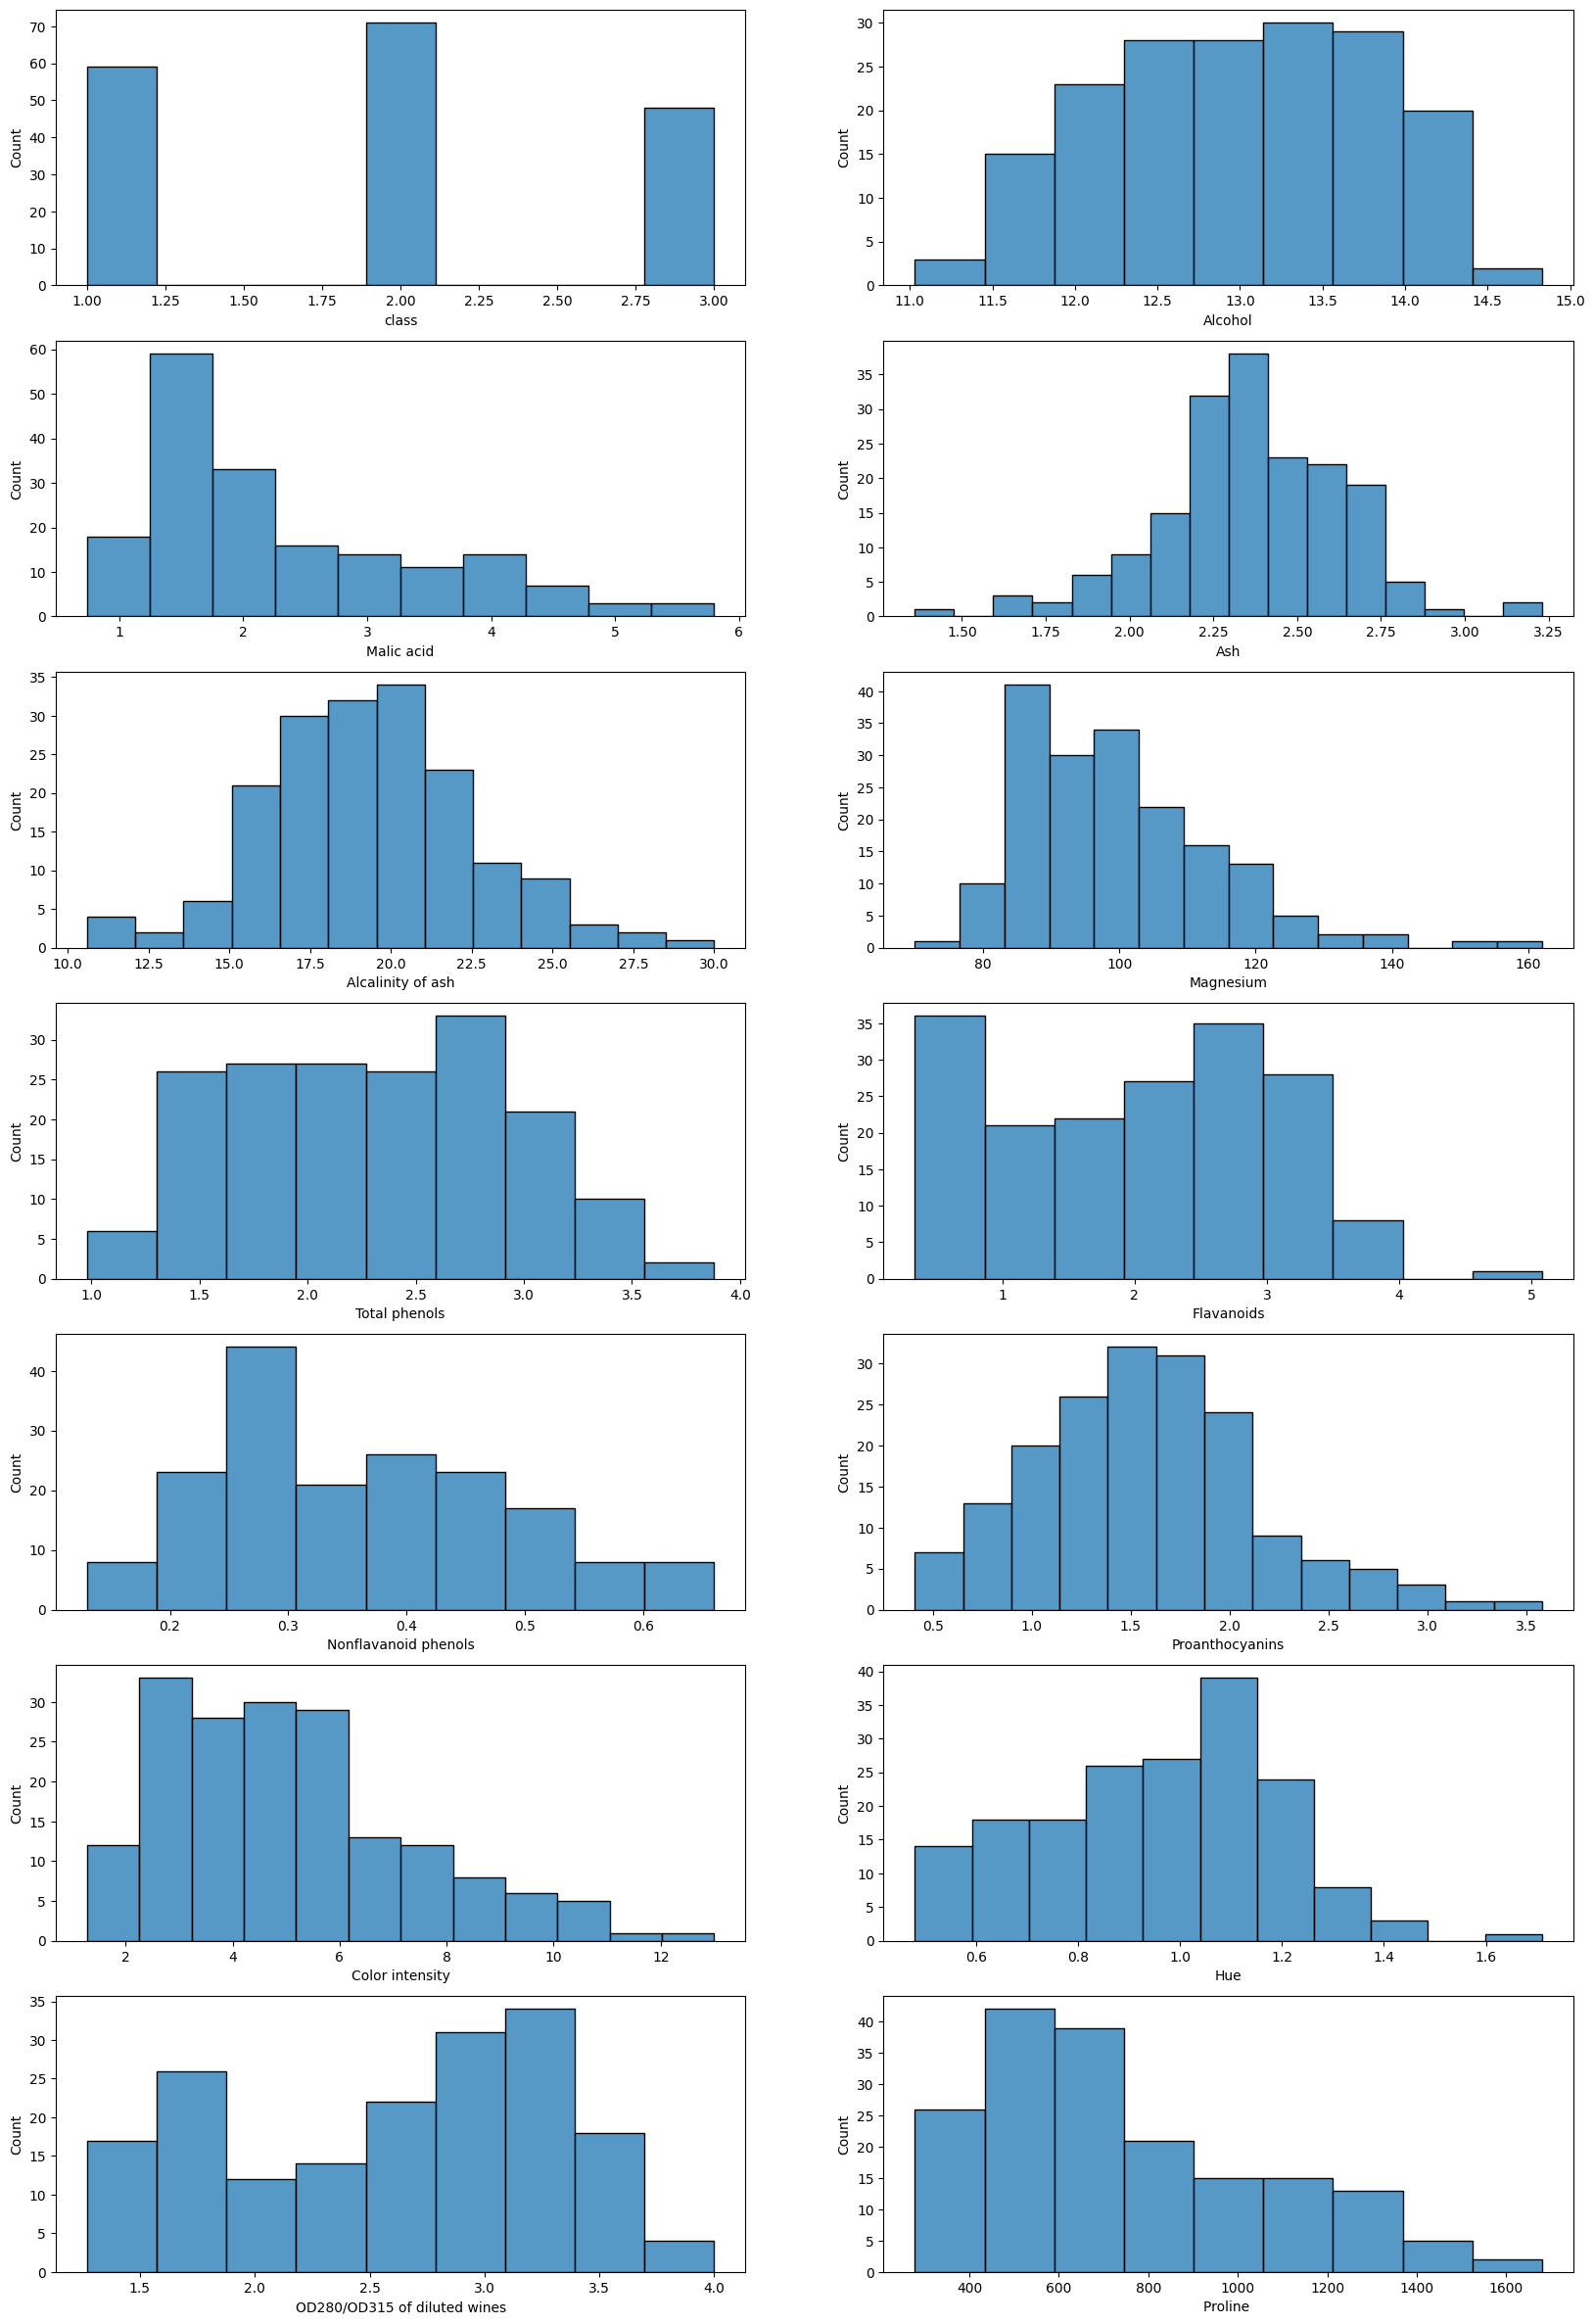

In [62]:
fig, axes = plt.subplots(nrows = 7, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(20,30)
for ax, col in zip(axes, wine.columns):
    sns.histplot(x=wine[col], ax=ax)
    #ax.set_title(col)

<Axes: >

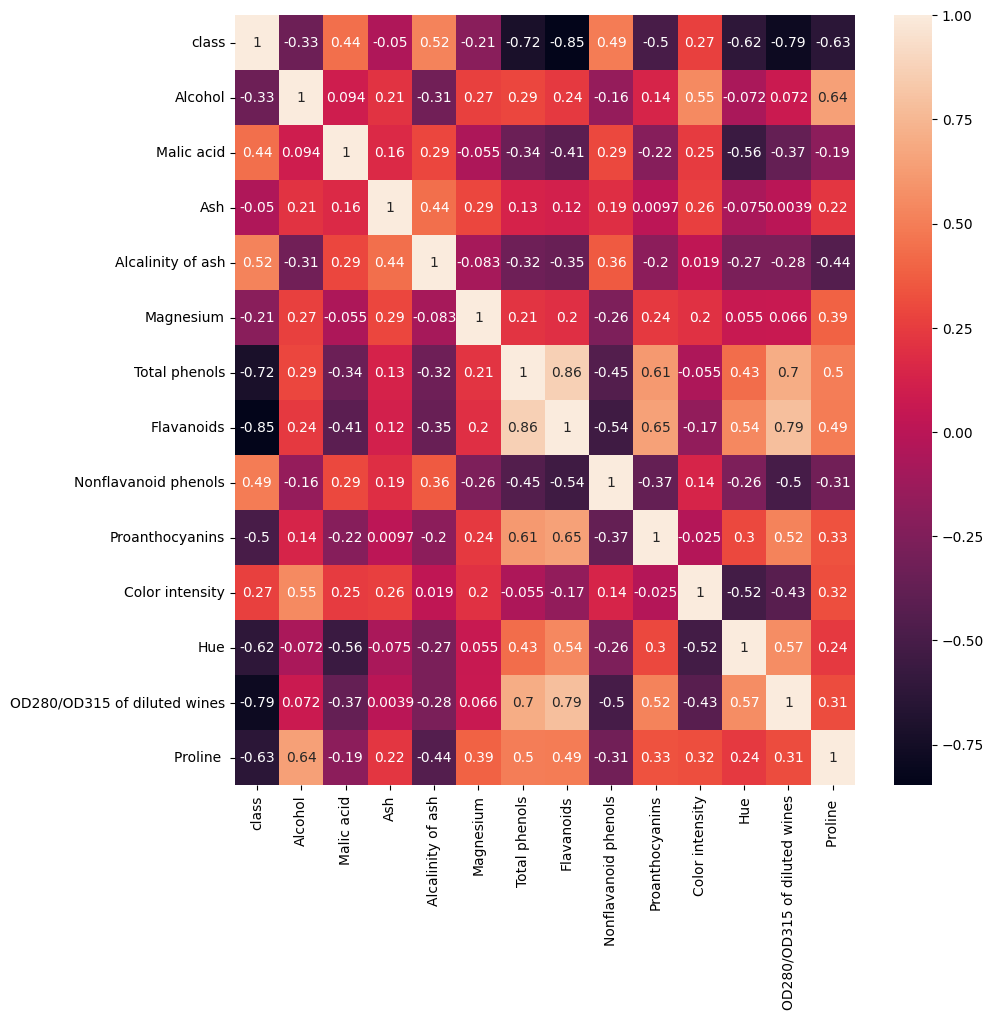

In [46]:
# Create a heatmap showing the correlation of each stat of wine
corr = wine.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

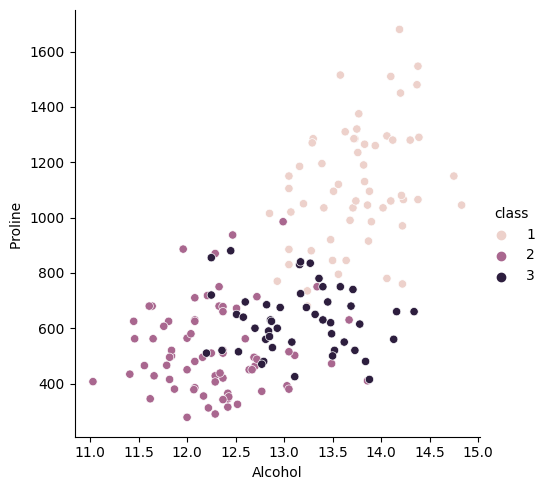

In [64]:
sns.relplot(x=wine['Alcohol'], y=wine['Proline '], hue=wine['class'])


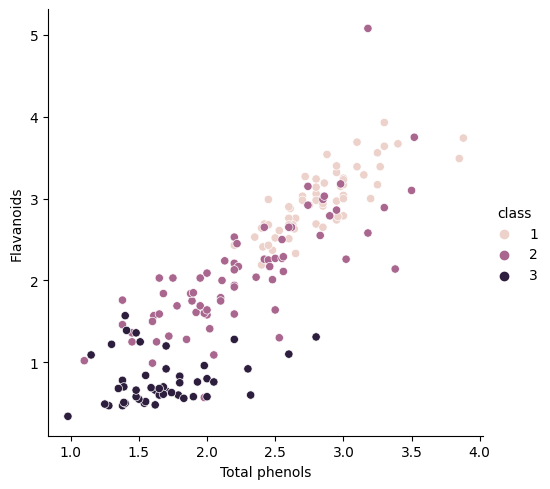

In [65]:
sns.relplot(x=wine['Total phenols'], y=wine['Flavanoids'], hue=wine['class'])

In [67]:
X=wine.drop(['class'], axis=1)
y=wine['class']
scaler=StandardScaler()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

In [70]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Logistic Regression  


In [71]:
from sklearn.linear_model import LogisticRegression

In [76]:
log_reg=LogisticRegression(max_iter=1000)

In [77]:
log_reg.fit(X,y)
predict = log_reg.predict(X)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
accuracy = accuracy_score(y, predict)

In [80]:
print("Accuracy:", round(accuracy, 2))

Accuracy: 0.98
